### Setup 

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

import wrangle

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

### Acquisition 

In [3]:
df = pd.read_csv('zillowcluster_df.csv') 

In [4]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


In [5]:
df.shape

(77413, 68)

In [6]:
df['has_amenities'] = np.where((df['fireplaceflag']==1) | (df['poolcnt']==1), 1, 0)

In [7]:
clean_df = clean_zillow(df)

In [8]:
clean_df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",0.00,...,0.00,1.23,0.21,0.30,0.50,0.67,1,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",0.00,...,0.00,1.23,0.21,0.30,0.40,0.50,1,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.00,1.23,0.22,0.30,0.40,0.50,0,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",0.00,...,0.00,1.43,0.26,0.30,0.30,0.67,1,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",0.00,...,0.00,1.26,0.26,0.30,0.40,0.50,1,1,0,0


In [9]:
clean_df.shape

(60655, 30)

In [10]:
train, validate, test = split(clean_df)

In [11]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
17300850,1.00,5.00,3.50,4.00,"3,080.00",6111,34.20,-118.68,"21,785.00",7.00,...,0.00,1.19,0.50,0.30,0.70,0.88,0,0,0,1
13993394,1.00,5.00,1.00,5.00,"1,448.00",6059,33.83,-117.95,"22,000.00",8.00,...,0.00,1.19,0.51,0.40,0.30,0.20,0,0,1,0
12496234,2.00,1.00,2.00,3.00,"1,361.00",6037,33.81,-118.12,"4,956.00",0.00,...,0.00,1.20,0.11,0.10,0.30,0.67,0,1,0,0
10818923,7.00,5.00,1.00,3.00,"1,180.00",6037,34.22,-118.51,"6,056.00",0.00,...,0.00,1.20,0.14,0.10,0.20,0.33,0,1,0,0
11462743,2.00,1.00,3.00,3.00,"2,544.00",6037,33.96,-118.43,"4,903.00",0.00,...,0.00,1.25,0.11,0.10,0.60,1.00,0,1,0,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33966 entries, 17300850 to 14678154
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         33966 non-null  float64       
 1   airconditioningtypeid         33966 non-null  float64       
 2   bathroomcnt                   33966 non-null  float64       
 3   bedroomcnt                    33966 non-null  float64       
 4   calculatedfinishedsquarefeet  33966 non-null  float64       
 5   fips                          33966 non-null  object        
 6   latitude                      33966 non-null  float64       
 7   longitude                     33966 non-null  float64       
 8   lotsizesquarefeet             33966 non-null  float64       
 9   roomcnt                       33966 non-null  float64       
 10  yearbuilt                     33966 non-null  object        
 11  taxvaluedollarcnt 

In [13]:
train.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county
count,"33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00",...,"33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00"
mean,3.02,4.20,2.16,3.01,"1,638.23",33.99,-118.18,"8,082.23",1.72,"408,807.24",...,0.00,1.28,0.19,0.17,0.34,0.75,0.23,0.60,0.31,0.09
std,3.46,2.21,0.76,0.92,620.77,0.27,0.37,"5,257.04",2.94,"281,627.47",...,0.00,0.23,0.12,0.10,0.17,0.27,0.42,0.49,0.46,0.29
min,1.00,1.00,1.00,1.00,360.00,33.34,-119.48,236.00,0.00,"11,089.00",...,0.00,0.24,0.01,0.00,0.00,0.20,0.00,0.00,0.00,0.00
25%,1.00,5.00,2.00,2.00,"1,181.00",33.79,-118.39,"5,641.25",0.00,"205,054.75",...,0.00,1.16,0.13,0.10,0.20,0.50,0.00,0.00,0.00,0.00
50%,2.00,5.00,2.00,3.00,"1,510.00",33.99,-118.14,"7,200.00",0.00,"355,497.50",...,0.00,1.23,0.17,0.20,0.40,0.67,0.00,1.00,0.00,0.00
75%,2.00,5.00,3.00,4.00,"1,990.00",34.17,-117.90,"8,136.00",4.00,"540,919.25",...,0.00,1.34,0.19,0.20,0.40,1.00,0.00,1.00,1.00,0.00
max,24.00,13.00,7.50,9.00,"3,499.00",34.72,-117.56,"36,778.00",12.00,"1,698,819.00",...,0.01,2.30,0.84,0.40,0.70,7.50,1.00,1.00,1.00,1.00


In [14]:
train.shape

(33966, 30)

In [15]:
validate.shape

(14558, 30)

In [16]:
test.shape

(12131, 30)

In [17]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [18]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_amenity_house,la_county,orange_county,ventura_county
0,0.00,0.33,0.38,0.38,0.87,0.62,0.42,0.59,0.58,0.38,...,0.36,0.09,0.46,0.59,0.75,1.00,0.00,0.00,0.00,1.00
1,0.00,0.33,0.00,0.50,0.35,0.35,0.79,0.60,0.67,0.27,...,0.71,0.06,0.46,0.60,1.00,0.43,0.00,0.00,1.00,0.00
2,0.04,0.00,0.15,0.25,0.32,0.34,0.71,0.13,0.00,0.33,...,0.50,0.12,0.46,0.12,0.25,0.43,0.00,1.00,0.00,0.00
3,0.26,0.33,0.00,0.25,0.26,0.64,0.50,0.16,0.00,0.27,...,0.50,0.07,0.47,0.16,0.25,0.29,0.00,1.00,0.00,0.00
4,0.04,0.00,0.31,0.25,0.70,0.45,0.55,0.13,0.00,0.44,...,0.29,0.10,0.49,0.12,0.25,0.86,0.00,1.00,0.00,0.00


In [19]:
train_scaled.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_amenity_house,la_county,orange_county,ventura_county
count,"33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00",...,"33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00","33,966.00"
mean,0.09,0.27,0.18,0.25,0.41,0.47,0.67,0.21,0.14,0.24,...,0.41,0.11,0.51,0.21,0.42,0.49,0.23,0.60,0.31,0.09
std,0.15,0.18,0.12,0.12,0.20,0.19,0.19,0.14,0.24,0.17,...,0.16,0.03,0.11,0.15,0.25,0.24,0.42,0.49,0.46,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.33,0.15,0.12,0.26,0.33,0.56,0.15,0.00,0.11,...,0.29,0.09,0.45,0.14,0.25,0.29,0.00,0.00,0.00,0.00
50%,0.04,0.33,0.15,0.25,0.37,0.47,0.70,0.19,0.00,0.20,...,0.43,0.11,0.48,0.19,0.50,0.57,0.00,1.00,0.00,0.00
75%,0.04,0.33,0.31,0.38,0.52,0.60,0.82,0.22,0.33,0.31,...,0.50,0.13,0.53,0.22,0.50,0.57,0.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Modeling

In [20]:
## latitude

## sq footage
### calculatedsquarefeet

## age of home 

## tax rate 

### different model for each county?

In [21]:
list(train_scaled.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'has_amenities',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'bath_amenity_house',
 'la_county',
 'orange_county',
 'ventura_county']

In [22]:
X = train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [23]:
X_validate = validate_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [24]:
X_test = test_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [25]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.62,0.87,0.30,0.46
1,0.35,0.35,0.70,0.46
2,0.34,0.32,0.49,0.46
3,0.64,0.26,0.49,0.47
4,0.45,0.70,0.22,0.49


In [26]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.05,0.04,0.33
calculatedfinishedsquarefeet,0.05,1.00,-0.29,-0.08
age_of_home,0.04,-0.29,1.00,0.07
taxrate,0.33,-0.08,0.07,1.00


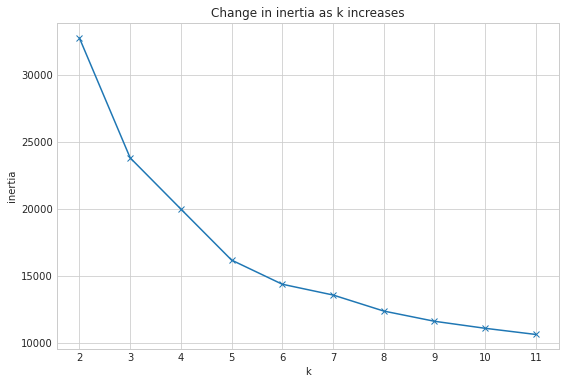

In [27]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [28]:
## it looks like the most appropriate k would be 5

In [29]:
kmeans = KMeans(n_clusters=5)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
kmeans.predict(X_validate)
kmeans.predict(X_test)
## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
validate_scaled['cluster'] = kmeans.predict(X_validate)
test_scaled['cluster'] = kmeans.predict(X_test)
## store the predictions as a column on your df

train['cluster'] = kmeans.predict(X)
validate['cluster'] = kmeans.predict(X_validate)
test['cluster'] = kmeans.predict(X_test)
## store the predictions as a column on your df

In [30]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,roomcnt,taxvaluedollarcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_amenity_house,la_county,orange_county,ventura_county,cluster
0,0.00,0.33,0.38,0.38,0.87,0.62,0.42,0.59,0.58,0.38,...,0.09,0.46,0.59,0.75,1.00,0.00,0.00,0.00,1.00,3
1,0.00,0.33,0.00,0.50,0.35,0.35,0.79,0.60,0.67,0.27,...,0.06,0.46,0.60,1.00,0.43,0.00,0.00,1.00,0.00,1
2,0.04,0.00,0.15,0.25,0.32,0.34,0.71,0.13,0.00,0.33,...,0.12,0.46,0.12,0.25,0.43,0.00,1.00,0.00,0.00,1
3,0.26,0.33,0.00,0.25,0.26,0.64,0.50,0.16,0.00,0.27,...,0.07,0.47,0.16,0.25,0.29,0.00,1.00,0.00,0.00,1
4,0.04,0.00,0.31,0.25,0.70,0.45,0.55,0.13,0.00,0.44,...,0.10,0.49,0.12,0.25,0.86,0.00,1.00,0.00,0.00,3


In [114]:
validate.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
10766026,2.00,5.00,2.00,2.00,"1,430.00",6037,34.22,-118.56,"8,404.00",0.00,...,1.24,0.19,0.20,0.30,1.00,0,1,0,0,4
13942624,1.00,5.00,1.00,3.00,"1,171.00",6059,33.77,-118.00,"7,246.00",5.00,...,2.02,0.17,0.20,0.20,0.33,0,0,1,0,1
14735779,1.00,5.00,2.00,2.00,950.00,6059,33.64,-117.68,"7,281.00",0.00,...,1.06,0.17,0.20,0.10,1.00,0,0,1,0,0
11452608,2.00,5.00,1.00,3.00,884.00,6037,33.87,-118.31,"5,000.00",0.00,...,1.15,0.11,0.10,0.10,0.33,0,1,0,0,1
12162450,2.00,1.00,1.00,2.00,"1,222.00",6037,34.20,-118.14,"11,166.00",0.00,...,1.21,0.26,0.30,0.20,0.50,0,1,0,0,1


In [115]:
test.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
10718215,2.00,1.00,3.00,4.00,"2,397.00",6037,34.21,-118.64,"11,021.00",0.00,...,1.22,0.25,0.30,0.50,0.75,1,1,0,0,3
11759398,7.00,5.00,2.00,2.00,"1,028.00",6037,34.05,-118.29,"3,825.00",0.00,...,1.32,0.09,0.00,0.20,1.00,0,1,0,0,1
11562658,2.00,1.00,2.00,2.00,"1,008.00",6037,34.04,-118.44,"24,767.00",0.00,...,1.21,0.57,0.40,0.20,1.00,0,1,0,0,4
12963165,2.00,1.00,2.00,3.00,"1,376.00",6037,34.12,-118.00,"7,394.00",0.00,...,1.76,0.17,0.20,0.30,0.67,0,1,0,0,1
14691230,1.00,5.00,2.50,3.00,"1,250.00",6059,33.75,-117.93,"7,281.00",0.00,...,1.18,0.17,0.20,0.20,0.83,0,0,1,0,0


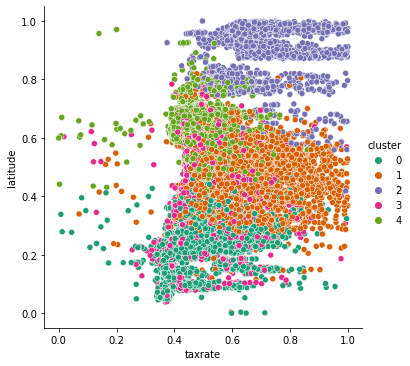

In [31]:
sns.relplot(data=train_scaled, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

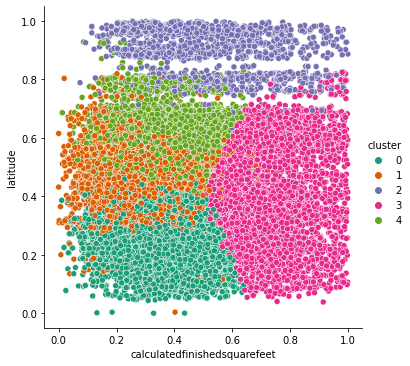

In [32]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

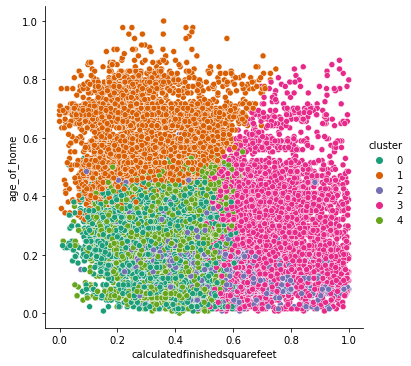

In [119]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='age_of_home', hue='cluster', palette= 'Dark2')

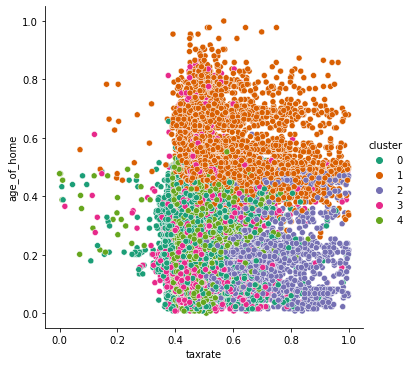

In [120]:
sns.relplot(data=train_scaled, x='taxrate', y='age_of_home', hue='cluster', palette= 'Dark2')

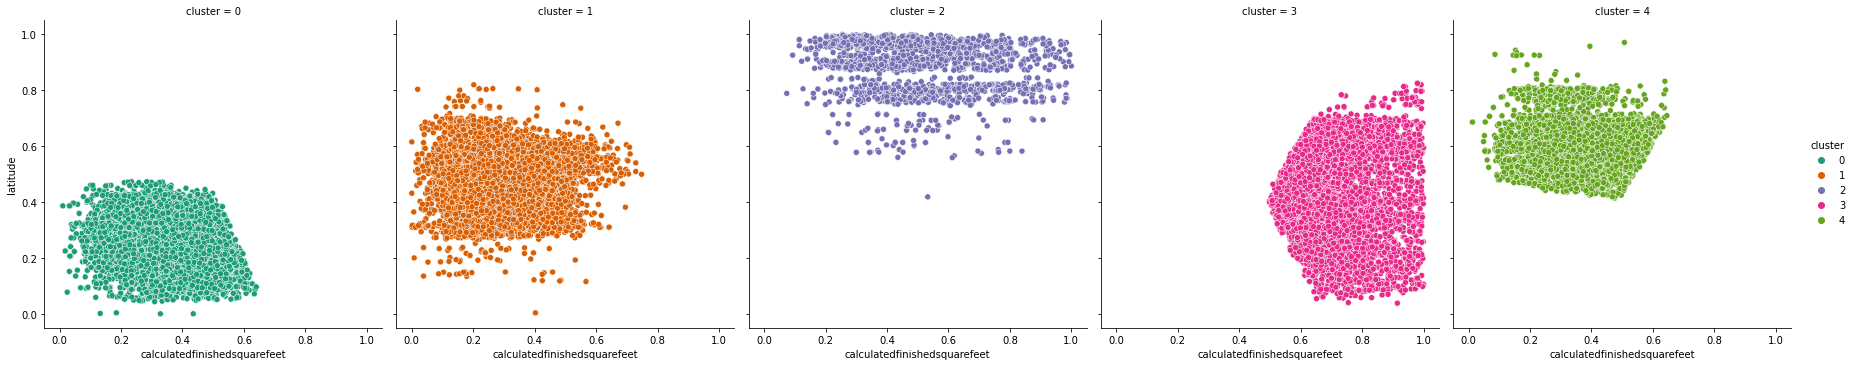

In [121]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', col = 'cluster', palette= 'Dark2')

(-1.0, 1.0)

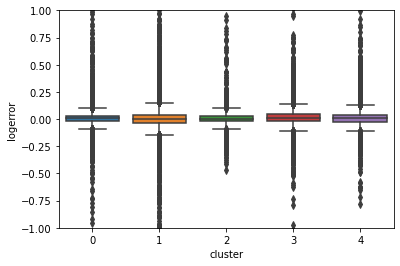

In [118]:
sns.boxplot(y=train.logerror, x=train.cluster)
plt.ylim(-1, 1)

In [34]:
## save clusters to csv to be explored

In [35]:
model1 = train

In [36]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17300850,1.00,5.00,3.50,4.00,"3,080.00",6111,34.20,-118.68,"21,785.00",7.00,...,1.19,0.50,0.30,0.70,0.88,0,0,0,1,3
13993394,1.00,5.00,1.00,5.00,"1,448.00",6059,33.83,-117.95,"22,000.00",8.00,...,1.19,0.51,0.40,0.30,0.20,0,0,1,0,1
12496234,2.00,1.00,2.00,3.00,"1,361.00",6037,33.81,-118.12,"4,956.00",0.00,...,1.20,0.11,0.10,0.30,0.67,0,1,0,0,1
10818923,7.00,5.00,1.00,3.00,"1,180.00",6037,34.22,-118.51,"6,056.00",0.00,...,1.20,0.14,0.10,0.20,0.33,0,1,0,0,1
11462743,2.00,1.00,3.00,3.00,"2,544.00",6037,33.96,-118.43,"4,903.00",0.00,...,1.25,0.11,0.10,0.60,1.00,0,1,0,0,3


In [37]:
model1['cluster'] = kmeans.predict(X)

In [38]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,roomcnt,...,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,bath_amenity_house,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17300850,1.00,5.00,3.50,4.00,"3,080.00",6111,34.20,-118.68,"21,785.00",7.00,...,1.19,0.50,0.30,0.70,0.88,0,0,0,1,3
13993394,1.00,5.00,1.00,5.00,"1,448.00",6059,33.83,-117.95,"22,000.00",8.00,...,1.19,0.51,0.40,0.30,0.20,0,0,1,0,1
12496234,2.00,1.00,2.00,3.00,"1,361.00",6037,33.81,-118.12,"4,956.00",0.00,...,1.20,0.11,0.10,0.30,0.67,0,1,0,0,1
10818923,7.00,5.00,1.00,3.00,"1,180.00",6037,34.22,-118.51,"6,056.00",0.00,...,1.20,0.14,0.10,0.20,0.33,0,1,0,0,1
11462743,2.00,1.00,3.00,3.00,"2,544.00",6037,33.96,-118.43,"4,903.00",0.00,...,1.25,0.11,0.10,0.60,1.00,0,1,0,0,3


In [39]:
model1.groupby('fips').cluster.value_counts()

fips  cluster
6037  1          8944
      4          5193
      3          2876
      2          2120
      0          1187
6059  0          6728
      3          2507
      1          1313
      4            14
      2             1
6111  4          2299
      3           563
      1           133
      2            88
Name: cluster, dtype: int64

In [40]:
model1.to_csv('model1.csv')

## Statistical Testing

In [124]:
from math import sqrt

#### Cluster 0

In [122]:
H0 = 'There is no difference in the logerror between Cluster 0 and the general population'

H1 = 'There is a difference in the logerror between Cluster 0 and the general population'

alpha = .05

In [125]:
cluster0 = train[train.cluster == 0]

μ = train.logerror.mean()
xbar = cluster0.logerror.mean()
s = cluster0.logerror.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.0516635594344246, 1.707013954504217)

In [126]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


#### Cluster 1

In [127]:
H0 = 'There is no difference in the logerror between Cluster 1 and the general population'

H1 = 'There is a difference in the logerror between Cluster 1 and the general population'

alpha = .05

In [128]:
cluster1 = train[train.cluster == 1]

μ = train.logerror.mean()
xbar = cluster1.logerror.mean()
s = cluster1.logerror.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.773684799407447, 1.9238554109186476)

In [129]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


#### Cluster 2

In [130]:
H0 = 'There is no difference in the logerror between Cluster 2 and the general population'

H1 = 'There is a difference in the logerror between Cluster 2 and the general population'

alpha = .05

In [131]:
cluster2 = train[train.cluster == 2]

μ = train.logerror.mean()
xbar = cluster2.logerror.mean()
s = cluster2.logerror.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-1.279926175301404, 1.7992944399685906)

In [132]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


#### Cluster 3

In [133]:
H0 = 'There is no difference in the logerror between Cluster 3 and the general population'

H1 = 'There is a difference in the logerror between Cluster 3 and the general population'

alpha = .05

In [134]:
cluster3 = train[train.cluster == 3]

μ = train.logerror.mean()
xbar = cluster3.logerror.mean()
s = cluster3.logerror.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(4.287418242655985, 1.8362111833678153e-05)

In [135]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

There is a difference in the logerror between Cluster 3 and the general population


In [136]:
## We can conclude there is a difference in logerror rates between cluster 3 and the general population

## homes that are in the larger half, regardless of age or tax rate, in the middle to southern half of area surveyed 

#### Cluster 4

In [137]:
H0 = 'There is no difference in the logerror between Cluster 4 and the general population'

H1 = 'There is a difference in the logerror between Cluster 4 and the general population'

alpha = .05

In [138]:
cluster4 = train[train.cluster == 4]

μ = train.logerror.mean()
xbar = cluster4.logerror.mean()
s = cluster4.logerror.std()
n = cluster4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

t, p

(-0.6373555949176607, 1.476087312221535)

In [139]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else: 
    print(H1)

We fail to reject the null hypothesis


In [140]:
## Only cluster 3 has a significant difference in logerror rates, it should be made into a variable for regression